In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
column_names = ["sex","length","diameter","height","whole weight","shucked weight","viscera weight","shell weight","rings"]
data = pd.read_csv("data.csv",sep=",",names=column_names)

In [ ]:
gender_quantity = data['sex'].value_counts().reset_index()
gender_quantity.columns = [' ', 'count']

total_snails = gender_quantity['count'].sum()
gender_quantity['%'] = (gender_quantity['count'] / total_snails) * 100
gender_quantity['%'] = gender_quantity['%'].round(2)

category_counts = gender_quantity.sort_values(by=' ')


gender_quantity[' '] = gender_quantity[' '].replace({'M': 'MALE', 'I': 'INFANT', 'F': 'FEMALE'})

print(gender_quantity)

In [ ]:
import pandas as pd

column_names = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight", "rings"]


data_rows = []

for variable in column_names[1:]:
    name = variable
    mean = data[variable].mean()
    std = data[variable].std()
    minimum = data[variable].min()
    q1 = data[variable].quantile(0.25)
    median = data[variable].median()
    q3 = data[variable].quantile(0.75)
    maximum = data[variable].max()
    data_rows.append([name, mean, std, minimum, q1, median, q3, maximum])


summary_stats = pd.DataFrame(data_rows, columns=[' ', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print(summary_stats)


In [ ]:
sns.countplot(data=data, x='sex')
plt.xlabel('gender')
plt.ylabel('quantity')
plt.show()

In [ ]:
fig, plots_req4 = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=1)

i = 0
for variable in column_names[1:]:
    row = i // 2
    col = i % 2
    plots_req4[row, col].hist(data[variable], bins=20, edgecolor='yellow', color='black')
    plots_req4[row, col].set_title(f'Histogram of {variable}')
    plots_req4[row, col].set_xlabel(variable)
    plots_req4[row, col].set_ylabel('Frequency')
    i = i+1
plt.show()

In [ ]:
fig, plots_req5 = plt.subplots(14, 2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.75)
p = 2
i = 0
for variable in column_names[1:]:
    for variable2 in column_names[p:]:
        row = i // 2
        col = i % 2
        plots_req5[row, col].scatter(data[variable], data[variable2], color='yellow')
        plots_req5[row, col].set_title(f'Scatter plot of {variable} to {variable2}')
        plots_req5[row, col].set_xlabel(variable)
        plots_req5[row, col].set_ylabel(variable2)
        i = i+1
    p = p+1
plt.show()

In [86]:
correlation_matrix = data[column_names[1:]].corr()
display(correlation_matrix)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


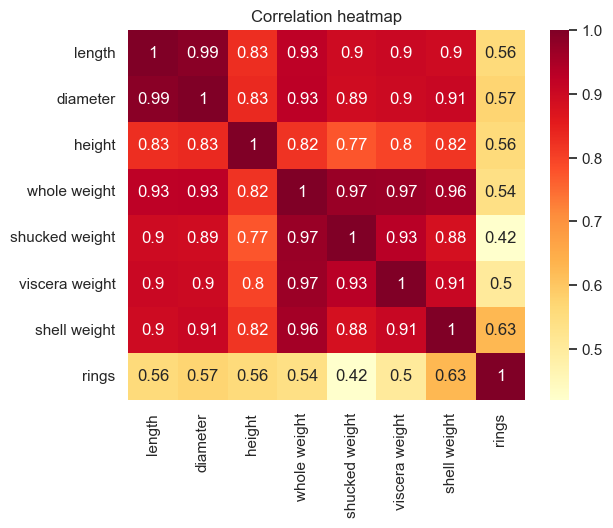

In [98]:
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title("Correlation heatmap")
plt.show()

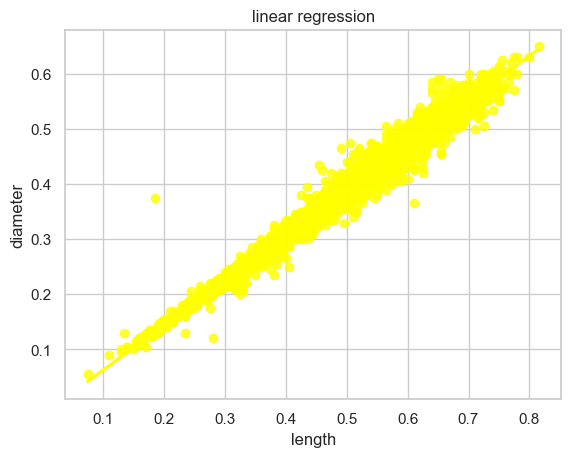

In [100]:
sns.regplot(data=data, x='length', y='diameter', color='yellow')
plt.title("linear regression")
plt.show()